# Collection of GOES-17 Satellite Images

## Justin Richling
## 09/20/18


# GOES-17 Channels

Plot the 4 main images: 

* Visible - Red (Band 2) 

* Mid-Level Water Vapor (Band 9)

* Clean Infrared (Band 13)

* True Color RGB: Band 2, Band 3, Band 1

http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi

In [ ]:
%matplotlib inline

# Imports

In [ ]:
# Random Library Imports
import subprocess,os,glob,tempfile,re,imageio,webbrowser,io,sys,types,urllib,urllib2,\
time,cStringIO

# Importing Datetime Libraries
from datetime import datetime

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj 

# Numerical and Scientific Libraries
import numpy as np
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter

# Accessing Data from External Databases via XLM Catalog
from siphon.ncss import NCSS
from siphon.catalog import TDSCatalog

# MetPy Libraries
import metpy
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import ctables
from metpy.plots import add_metpy_logo
from metpy.plots.ctables import registry

# NetCDF Libraries
from netCDF4 import Dataset
from netCDF4 import num2date

# More Image Manipulation Options
import PIL
from PIL import Image as PILImage

# Ipyhton Options
from IPython import get_ipython
from nbformat import current
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML, display, Image

# Matplotlib Plotting Libraries
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm, Normalize
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Pull the current time
now = datetime.now()

In [3]:
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [4]:
# Unidata/MetPy Dictionary of GOES channels

channel_list = {u'1 - Blue Band 0.47 \u03BCm': 1,
                u'2 - Red Band 0.64 \u03BCm': 2,
                u'3 - Veggie Band 0.86 \u03BCm': 3,
                u'4 - Cirrus Band 1.37 \u03BCm': 4,
                u'5 - Snow/Ice Band 1.6 \u03BCm': 5,
                u'6 - Cloud Particle Size Band 2.2 \u03BCm': 6,
                u'7 - Shortwave Window Band 3.9 \u03BCm': 7,
                u'8 - Upper-Level Tropo. WV Band 6.2 \u03BCm': 8,
                u'9 - Mid-Level Tropo. WV Band 6.9 \u03BCm': 9,
                u'10 - Low-Level WV Band 7.3 \u03BCm': 10,
                u'11 - Cloud-Top Phase Band 8.4 \u03BCm': 11,
                u'12 - Ozone Band 9.6 \u03BCm': 12,
                u'13 - Clean IR Longwave Band 10.3 \u03BCm': 13,
                u'14 - IR Longwave Band 11.2 \u03BCm': 14,
                u'15 - Dirty Longwave Band 12.3 \u03BCm': 15,
                u'16 - CO2 Longwave IR 13.3 \u03BCm': 16}

# Archived Data

In [ ]:
dt = datetime(2019, 1, 16, 18)

# Set a path to save the plots with string format for the date to set the month and day 
save_path = '/path/to/saved files/'
print save_path

# Check to see if the folder already exists, if not create it
if not os.path.isdir(save_path):
    os.makedirs(save_path)
    
now = dt
print now

Webpage = "http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi"+\
    "?source=aws&domain=C&product=ABI-L1b-Rad&date="+\
    '{0:%Y}'.format(dt)+"-"+'{0:%m}'.format(dt)+"-"+'{0:%d}'.format(dt)+"&hour="+'{0:%H}'.format(dt)

# --------------------------------------------------------------------------------------------

# Current Day's Data

In [ ]:
dt = datetime.now()

# Set a path to save the plots with string format for the date to set the month and day 
save_path ='/path/to/saved files/'"
print save_path

# Check to see if the folder already exists, if not create it
if not os.path.isdir(save_path):
    os.makedirs(save_path)
    
now = dt
print now

Webpage = "http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi"+\
    "?source=aws&domain=C&product=ABI-L1b-Rad&date="+\
    '{0:%Y}'.format(dt)+"-"+'{0:%m}'.format(dt)+"-"+'{0:%d}'.format(dt)+"&hour="+'{0:%H}'.format(dt)

In [ ]:
webbrowser.open(Webpage)

# --------------------------------------------------------------------------------------------

# Populate the Lists for Different Channels

In [ ]:
GOES_sample_path = '/path/to/data files/'


############################################################################################
# Channel 1
GOES17_samples_1 = []
for name in glob.glob(GOES_sample_path+'OR*L1b*RadC*C01*G17*'+'{0:%Y%j}'.format(dt)+'*.nc'):
    GOES17_samples_1.append(name)
GOES17_samples_1 = [os.path.join(GOES_sample_path, s) for s in GOES17_samples_1]
GOES17_samples_1 = sorted(GOES17_samples_1, key=lambda x: int(re.sub('\D', '', x)))

############################################################################################
# Channel 2
GOES17_samples_2 = []
for name in glob.glob(GOES_sample_path+'OR*L1b*RadC*C02*G17*'+'{0:%Y%j}'.format(dt)+'*.nc'):
    GOES17_samples_2.append(name)
GOES17_samples_2 = [os.path.join(GOES_sample_path, s) for s in GOES17_samples_2]
GOES17_samples_2 = sorted(GOES17_samples_2, key=lambda x: int(re.sub('\D', '', x)))

############################################################################################
# Channel 3
GOES17_samples_3 = []
for name in glob.glob(GOES_sample_path+'OR*L1b*RadC*C03*G17*'+'{0:%Y%j}'.format(dt)+'*.nc'):
    GOES17_samples_3.append(name)
GOES17_samples_3 = [os.path.join(GOES_sample_path, s) for s in GOES17_samples_3]
GOES17_samples_3 = sorted(GOES17_samples_3, key=lambda x: int(re.sub('\D', '', x)))

############################################################################################
# Channel 9
GOES17_samples_9 = []
for name in glob.glob(GOES_sample_path+'OR*L1b*RadC*C09*'+'{0:%Y%j}'.format(dt)+'*.nc'):
    GOES17_samples_9.append(name)
GOES17_samples_9 = [os.path.join(GOES_sample_path, s) for s in GOES17_samples_9]
GOES17_samples_9 = sorted(GOES17_samples_9, key=lambda x: int(re.sub('\D', '', x)))

############################################################################################
# Channel 13
GOES17_samples_13 = []
for name in glob.glob(GOES_sample_path+'OR*L1b*RadC*C13*G17*'+'{0:%Y%j}'.format(dt)+'*.nc'):
    GOES17_samples_13.append(name)
GOES17_samples_13 = [os.path.join(GOES_sample_path, s) for s in GOES17_samples_13]
GOES17_samples_13 = sorted(GOES17_samples_13, key=lambda x: int(re.sub('\D', '', x)))


GOES17_samples_9

# Single images, loops are further down in the notebook

In [ ]:
# CONUS Lon/Lat Box

# [Lon_0, Lon_1, Lat_0, Lat_1]
extent = [-130., -70, 20., 60.] 

## True Color

Source for working code - super useful and almost turn-key

http://edc.occ-data.org/goes16/python/#psuedo-true-color-image

In [63]:
# Rebin function from https://stackoverflow.com/questions/8090229/resize-with-averaging-or-rebin-a-numpy-2d-array
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [62]:
# Define some constants needed for the conversion
Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3

In [ ]:
ch2nc = Dataset(GOES17_samples_2[0])
vis_name = GOES17_samples_2[i][-76:]
radiance = ch2nc.variables['Rad'][:]
#ch2nc.close()
#ch2nc = None

# Apply the formula to convert radiance to reflectance
ref = (radiance * np.pi * d2) / Esun_Ch_02

# Make sure all data is in the valid data range
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)

# Apply the formula to adjust reflectance gamma
ref_gamma = np.sqrt(ref)

# Load Channel 1 - Blue Visible
ch1nc = Dataset(GOES17_samples_1[i])
radiance_1 = ch1nc.variables['Rad'][:]
ch1nc.close()
ch1nc = None
ref_1 = (radiance_1 * np.pi * d2) / Esun_Ch_01
# Make sure all data is in the valid data range
ref_1 = np.maximum(ref_1, 0.0)
ref_1 = np.minimum(ref_1, 1.0)
ref_gamma_1 = np.sqrt(ref_1)

# Load Channel 3 - Veggie Near IR
ch3nc = Dataset(GOES17_samples_3[i])
radiance_3 = ch3nc.variables['Rad'][:]
ch3nc.close()
ch3nc = None
ref_3 = (radiance_3 * np.pi * d2) / Esun_Ch_03
# Make sure all data is in the valid data range
ref_3 = np.maximum(ref_3, 0.0)
ref_3 = np.minimum(ref_3, 1.0)
ref_gamma_3 = np.sqrt(ref_3)
    
# Resize the channel 2 since it is higher resolution and thus different dims of 1 & 3
ref_gamma_2 = rebin(ref_gamma, [3000, 5000])

# Derived from Planet Labs data, CC > 0.9
ref_gamma_true_green = 0.48358168 * ref_gamma_2 + 0.45706946 * ref_gamma_1 + 0.06038137 * ref_gamma_3
    
# Find and convert Julian day to date    
import datetime as DT
dt2 = datetime(2019,1,1)
dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
Day = dt2 + dtdelta
    
title = "GOES-17 True Color"
title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]
    
    
sat_h = ch2nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch2nc.variables['x'][:] * sat_h
Y = ch2nc.variables['y'][:] * sat_h

# Set the projections for plotting 
proj_var = ch2nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

# Create a new fig
fig = plt.figure(figsize=(17., 11.))

# Add state and country boundaries to plot
states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs) 

# Set the plot title    
plt.title(title,loc='left',fontdict=font)
plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

#ax.set_extent([-130., -70, 20., 60.], ccrs.PlateCarree()) # CONUS
ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
#ax.gridlines(color="w", linestyle="dotted",alpha=0.5)
    
# Create the actual RGB true color composite array to plot
truecolor = np.stack([ref_gamma_2, ref_gamma_true_green, ref_gamma_1], axis=2)

im = plt.imshow(truecolor[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
                interpolation='nearest',transform=crs) #,vmin=vmin,vmax=vmax

#plt.show()
outfile = "GOES17_TrueColor_"+str(im_file)+".png"
fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
plt.close(fig)

<h2>----------------------------------------------//---------------------------------------------------------</h2>

## IR - Channel 13
With the help of searching through some Unidata public emails, I was able to find the color table for the NESDIS IR colorbar. 
* https://www.unidata.ucar.edu/mailing_lists/archives/ldm-users/2018/msg00055.html

In [32]:
# Recreation of NESDID IR color bar, thanks to Unidata for making this possible

red = []
green = []
blue = []
valmin=-110.
valmax=55.
red.append( [0.0, 0.0, 0.0] ) 
green.append( [0.0, 0.0, 0.0] )
blue.append( [0.0, 0.0, 0.0] )
red.append( [ (-50.0-valmin)/(valmax-valmin), 0.0, 0.0 ] )
green.append( [ (-50.0-valmin)/(valmax-valmin), 1.0, 1.0 ] )
blue.append( [ (-50.0-valmin)/(valmax-valmin), 0.0, 0.0 ] )
red.append( [ (-40.0-valmin)/(valmax-valmin), 0.0, 0.0 ] )
green.append( [ (-40.0-valmin)/(valmax-valmin), 0.0, 0.0 ] )
blue.append( [ (-40.0-valmin)/(valmax-valmin), 0.4, 0.4 ] )
red.append( [ (-30.0-valmin)/(valmax-valmin), 0.0, 0.8 ] )
green.append( [ (-30.0-valmin)/(valmax-valmin), 1.0, 0.8 ] )
blue.append( [ (-30.0-valmin)/(valmax-valmin), 1.0, 0.8 ] )
red.append( [ 1.0, 0.0, 0.0 ] )
green.append( [ 1.0, 0.0, 0.0 ] )
blue.append( [ 1.0, 0.0, 0.0 ] )
cdict = {'red': red, 'green': green, 'blue': blue}
ctbl = LinearSegmentedColormap('custom', cdict)

cdict = {'red': ((0.0, 0.0, 0.0),
                 (.001, 1.00, 1.00),
                 (.107, 1.00, 1.00),
                 (.113, 0.498, 0.498),
                 (.173, 1.00, 1.00),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.902, 0.902),
                 (.293, 1.00, 1.00),
                 (.346, 1.00, 1.00),
                 (.352, 1.00, 1.00),
                 (.406, 0.101, 0.101),
                (.412, 0.00, 0.00),
                 (.481, 0.00, 0.00),
                 (.484, 0.00, 0.00),
                 (.543, 0.00, 0.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                 (.001, 1.00, 1.00),
                 (.107, 1.00, 1.00),
                 (.113, 0.00, 0.00),
                 (.173, 0.498, 0.498),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.00, 0.00),
                 (.293, 0.00, 0.00),
                 (.346, 0.902, 0.902),
                 (.352, 1.00, 1.00),
                 (.406, 1.00, 1.00),
                 (.412, 1.00, 1.00),
                 (.481, 0.00, 0.00),
                 (.484, 0.00, 0.00),
                 (.543, 1.00, 1.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                   (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.00, 0.00),
                 (.001, 1.00, 1.00),
                 (.107, 0.00, 0.00),
                 (.113, 0.498, 0.498),
                 (.173, 0.786, 0.786),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.00, 0.00),
                 (.293, 0.00, 0.00),
                 (.346, 0.00, 0.00),
                 (.352, 0.00, 0.00),
                 (.406, 0.00, 0.00),
                 (.412, 0.00, 0.00),
                 (.481, 0.451, 0.451),
                 (.484, 0.451, 0.451),
                 (.543, 1.00, 1.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                  (1.0, 0.0, 0.0))}

IR_cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,2048)

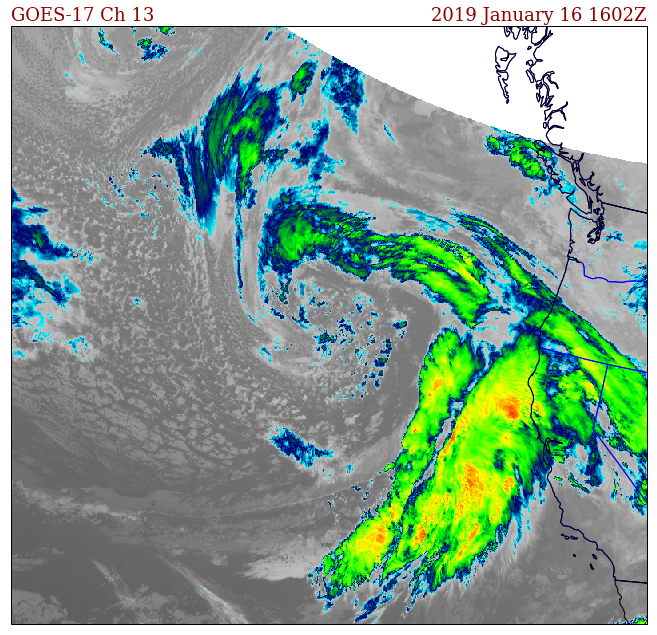

In [12]:
ch13nc = Dataset(GOES17_samples_13[0])
vis_name = GOES17_samples_13[0][-76:]
data_IR = ch13nc.variables['Rad'][:]
        #ch2nc.close()
        #ch2nc = None

fk1 = ch13nc.variables['planck_fk1'][0]
fk2 = ch13nc.variables['planck_fk2'][0]
bc1 = ch13nc.variables['planck_bc1'][0]
bc2 = ch13nc.variables['planck_bc2'][0]

data_IR = (fk2 / ( np.log((fk1 / data_IR) + 1 )) - bc1) / bc2


# Find and convert Julian day to date    
import datetime as DT
dt2 = datetime(2019,1,1)
dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
Day = dt2 + dtdelta
    
title = "GOES-17 Ch 13"
title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]
    
    
sat_h = ch13nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch13nc.variables['x'][:] * sat_h
Y = ch13nc.variables['y'][:] * sat_h

# Set the projections for plotting 
proj_var = ch13nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

# Create a new fig
fig = plt.figure(figsize=(17., 11.))

# Add state and country boundaries to plot
states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs) 

# Set the plot title    
plt.title(title,loc='left',fontdict=font)
plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

#ax.set_extent([-130., -70, 20., 60.], ccrs.PlateCarree()) # CONUS
ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
#ax.gridlines(color="w", linestyle="dotted",alpha=0.5)

im = plt.imshow(data_IR[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
                interpolation='nearest',transform=crs,vmin=162.,vmax=330.,cmap=IR_cmap) #,vmin=vmin,vmax=vmax

plt.show()
outfile = "GOES17_Ch13_"+str(im_file)+".png"
fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
#plt.close(fig)

<h2>----------------------------------------------//---------------------------------------------------------</h2>

## Red Visible - Channel 2

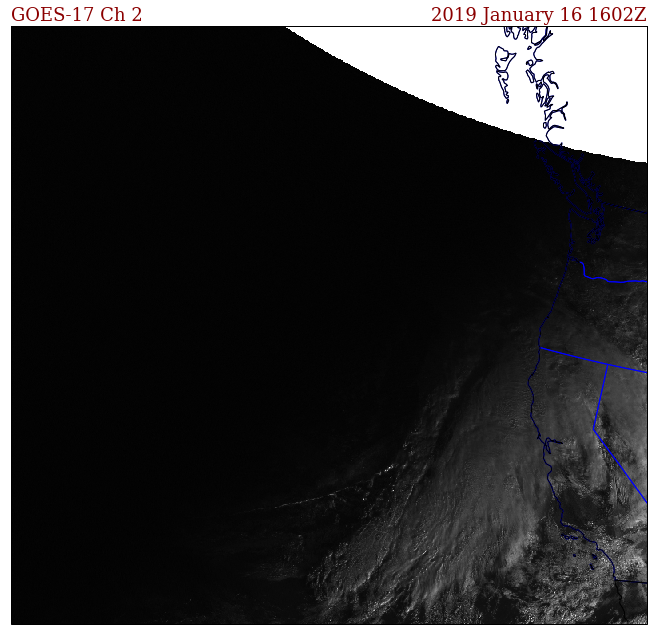

In [52]:
File = GOES17_samples_2[0]
ch2nc = Dataset(File)
vis_name = File[-76:]
data_IR = ch2nc.variables['Rad'][:]
        #ch2nc.close()
        #ch2nc = None

# Find and convert Julian day to date    
import datetime as DT
dt2 = datetime(2019,1,1)
dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
Day = dt2 + dtdelta
    
title = "GOES-17 Ch 2"
title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]
    
    
sat_h = ch2nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch2nc.variables['x'][:] * sat_h
Y = ch2nc.variables['y'][:] * sat_h

# Set the projections for plotting 
proj_var = ch2nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

# Create a new fig
fig = plt.figure(figsize=(17., 11.))

# Add state and country boundaries to plot
states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs) 

# Set the plot title    
plt.title(title,loc='left',fontdict=font)
plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

#ax.set_extent([-130., -70, 20., 60.], ccrs.PlateCarree()) # CONUS
ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
#ax.gridlines(color="w", linestyle="dotted",alpha=0.5)

im = plt.imshow(data_IR[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
                interpolation='nearest',transform=crs,cmap="gray") #,vmin=vmin,vmax=vmax

plt.show()
outfile = "GOES17_Ch2_"+str(im_file)+".png"
fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
#plt.close(fig)

<h2>----------------------------------------------//---------------------------------------------------------</h2>

<h1>Mid-Level Water Vapor Channel 9</h1>

In [ ]:
WV_cmap = ctables.registry.get_colortable('WVCIMSS_r')
wv_norm, wv_cmap = registry.get_with_range('WVCIMSS_r', 195, 265)

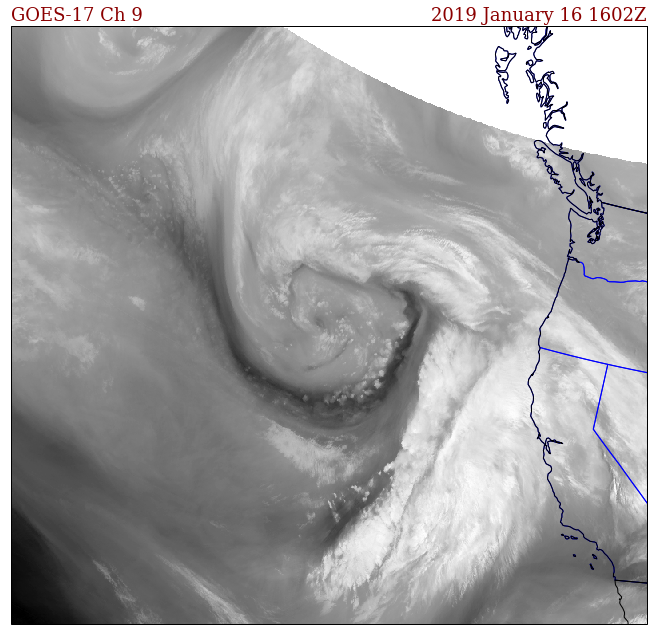

In [60]:
File = GOES17_samples_9[0]
ch9nc = Dataset(File)
wv_name = File[-76:]
data_WV = ch9nc.variables['Rad'][:]
        #ch2nc.close()
        #ch2nc = None

# Find and convert Julian day to date    
import datetime as DT
dt2 = datetime(2019,1,1)
dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
Day = dt2 + dtdelta
    
title = "GOES-17 Ch 9"
title_date = wv_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+wv_name[34:36]+""+wv_name[36:38]+"Z"
im_file = wv_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+wv_name[34:36]+wv_name[36:38]
    
    
sat_h = ch9nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch9nc.variables['x'][:] * sat_h
Y = ch9nc.variables['y'][:] * sat_h

# Set the projections for plotting 
proj_var = ch9nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

# Create a new fig
fig = plt.figure(figsize=(17., 11.))

# Add state and country boundaries to plot
states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs) 

# Set the plot title    
plt.title(title,loc='left',fontdict=font)
plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

#ax.set_extent([-130., -70, 20., 60.], ccrs.PlateCarree()) # CONUS
ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
#ax.gridlines(color="w", linestyle="dotted",alpha=0.5)

im = plt.imshow(data_WV[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
                interpolation='nearest',transform=crs,cmap="gist_gray_r") #,vmin=vmin,vmax=vmax

plt.show()
outfile = "GOES17_Ch9_"+str(im_file)+".png"
fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
#plt.close(fig)

<h2>----------------------------------------------//---------------------------------------------------------</h2>
<h2>----------------------------------------------//---------------------------------------------------------</h2>

<h1>We can also define a map projection function that can take details of the different channels</h1>
* path - data file location
* channel - which GOES channel number
* title - plot title
* my_cmap - desired color table
* vmin - (optional) min value for plotting
* vmax - (optional) max value for plotting

In [69]:
def Map(path,channel,title,savepath,my_cmap=None,vmin=None,vmax=None,extent):
    vis_name = path[-76:]
    nc = Dataset(path)
    data = nc.variables['Rad'][:]
            #ch2nc.close()
            #ch2nc = None
            
# For the ch 13 IR plot 
    if channel == 13:
        fk1 = nc.variables['planck_fk1'][0]
        fk2 = nc.variables['planck_fk2'][0]
        bc1 = nc.variables['planck_bc1'][0]
        bc2 = nc.variables['planck_bc2'][0]

        data = (fk2 / ( np.log((fk1 / data) + 1 )) - bc1) / bc2
    else:
        data = data
        
    sat_h = nc.variables['goes_imager_projection'].perspective_point_height
    
    X = nc.variables['x'][:] * sat_h
    Y = nc.variables['y'][:] * sat_h

    proj_var = nc.variables['goes_imager_projection']
    sat_height = proj_var.perspective_point_height
    central_lon = proj_var.longitude_of_projection_origin
    semi_major = proj_var.semi_major_axis
    semi_minor = proj_var.semi_minor_axis

# Create new figure
    fig = plt.figure(figsize=(17., 11.))

# Add state boundaries to plot
    states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

    country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
    globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
    crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
    plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
    ax = plt.subplot(111, projection=plotcrs) 
        
# Find and convert Julian day to date    
    import datetime as DT
    dt = datetime(2018,1,1)
    dtdelta = DT.timedelta(days=int(path[59:62])-1)
    Day = dt + dtdelta
    im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]
    title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
    im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]

# Set the plot title    
    plt.title(title,loc='left',fontdict=font)
    plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
    ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
    ax.add_feature(country_borders, edgecolor='black', linewidth=1)

# Set the plotting extent    
    ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific

# Plot the image
    img = ax.imshow(data[:],origin='upper',vmin=vmin,vmax=vmax,extent=(X.min(), X.max(), Y.min(), Y.max()),
        interpolation='nearest',transform=crs,cmap=my_cmap) 

# Display the figure
    plt.show()
    
# Set the name for saved figure, and save it    
    outfile = savepath+ "GOES17_Ch"+str(channel)+"_"+str(im_file)+".png"
    fig.savefig(outfile,bbox_inches='tight',dpi=120)

## We can now imput data from the different channels and have our generic map maker function run on each to produce our satellite images!

### Map Arguments: Map(path, channel, title, savepath, my_cmap, vmin=None, vmax=None)

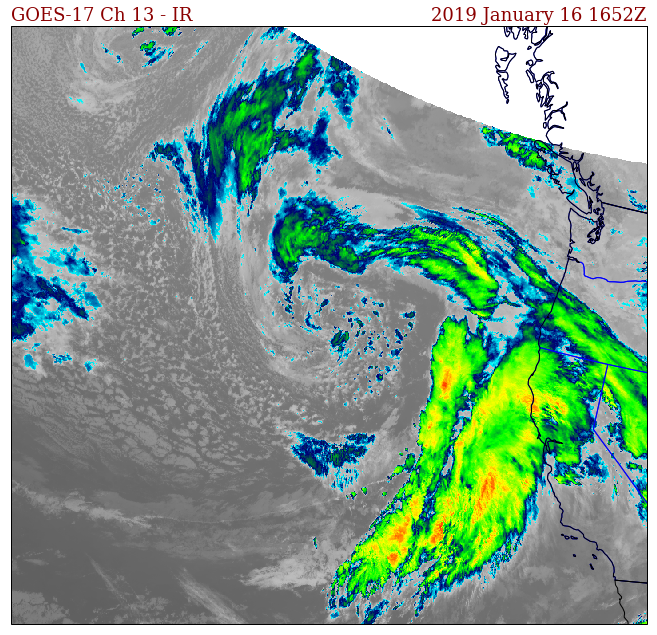

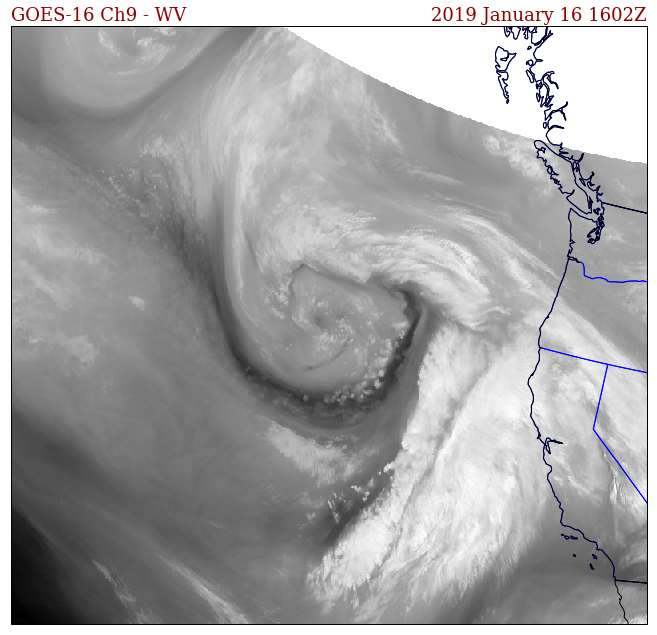

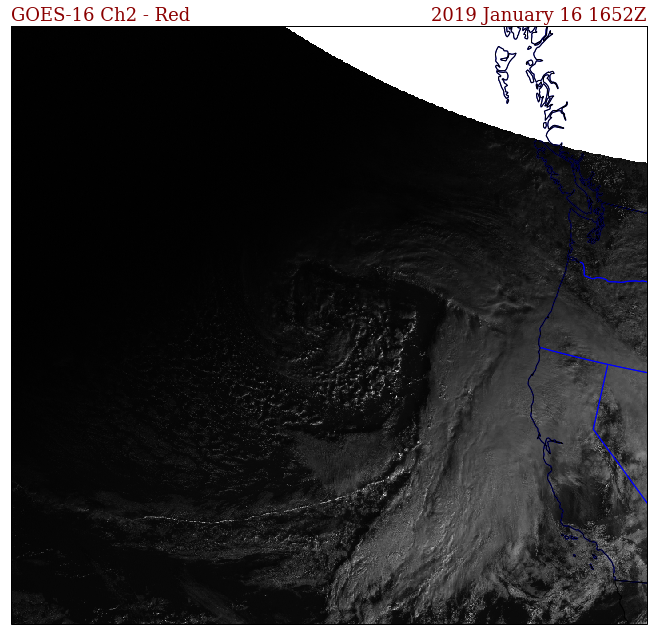

In [70]:
# Map(path,channel,title,savepath,my_cmap=None,vmin=None,vmax=None)

i = 10

channel=13
title = "GOES-17 Ch 13 - IR"
Map(GOES17_samples_13[i],channel,title,im_save_path,IR_cmap,vmin=162.,vmax=330.,extent)

channel = 9
title = 'GOES-17 Ch9 - WV'
#Map(GOES17_samples_9[i],channel,title,im_save_path,extent)
#Map(GOES17_samples_9[0],channel,title,im_save_path,WV_cmap,extent)
Map(GOES17_samples_9[0],channel,title,im_save_path,'gist_gray_r',extent)

channel = 2
title = 'GOES-17 Ch2 - VIS Red'
Map(GOES17_samples_2[i],channel,title,im_save_path,'gray',extent)

<h2>----------------------------------------------//---------------------------------------------------------</h2>
<h2>----------------------------------------------//---------------------------------------------------------</h2>

<h1>We can also take the lists of files we created earlier to plot multiple timesteps and create animated gifs</h1>

## Ch 13

In [ ]:
#%%time
print "Here we go..."
title = "GOES-17 Ch 13 - IR"
channel=13
for i in range(len(GOES17_samples_13)):

    Map(GOES17_samples_13[i],channel,title,im_save_path,IR_cmap,vmin=162.,vmax=330.,extent)
    
print "Images done"
print "gif activated..."

# Set a new list to hold all the images for this channel
files = []
# searching for the files with * 
for name in glob.glob(IRPATH+'*.png'):
    #print name
    files.append(name)

# Make sure our files are in chronological order so our animation is accurate
files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))

# Set a new list full of the images so we can create an animation
images = []
for filename in files:
    images.append(imageio.imread(filename))
imageio.mimsave(".gif", 
                images,duration=0.3)
print "gif done."

<h2>----------------------------------------------//---------------------------------------------------------</h2>

## Ch 9

In [ ]:
print "Here we go..."
channel = 9
title = 'GOES-17 Ch9 - WV'
for i in range(len(GOES17_samples_9)):

    Map(GOES17_samples_9[i],channel,title,im_save_path,extent)

print "Images done"
print "gif activated..."

# Set a new list to hold all the images for this channel
files = []
# searching for the files with * 
for name in glob.glob(WVPATH+'*.png'):
    #print name
    files.append(name)

# Make sure our files are in chronological order so our animation is accurate
files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))
    
# Set a new list full of the images so we can create an animation
images = []
for filename in files:
    images.append(imageio.imread(filename))
imageio.mimsave(".gif", 
                images,duration=0.3)
print "gif done."

<h2>----------------------------------------------//---------------------------------------------------------</h2>

## Ch 2

In [ ]:
print "Here we go..."
channel = 2
title = 'GOES-17 Ch2 - Red'
for i in range(len(GOES17_samples_2)):

    Map(GOES17_samples_2[i],channel,title,im_save_path,'gray',extent)
    
print "Images done"


In [ ]:
print "gif activated..."

# Set a new list to hold all the images for this channel
files = []
# searching for the files with * 
for name in glob.glob(VISPATH+'*.png'):
    #print name
    files.append(name)

# Make sure our files are in chronological order so our animation is accurate
files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))
    
# Set a new list full of the images so we can create an animation
images = []
for filename in files:
    images.append(imageio.imread(filename))
imageio.mimsave(".gif", 
                images,duration=0.3)
print "gif done."

<h2>----------------------------------------------//---------------------------------------------------------</h2>

# True Color

In [ ]:
ch2nc = Dataset(GOES17_samples_2[0])
sat_h = ch2nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch2nc.variables['x'][:] * sat_h
Y = ch2nc.variables['y'][:] * sat_h
    # Set the projections for plotting 
proj_var = ch2nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

In [ ]:
File = GOES17_samples_2
for i in range(len(File)): #len(GOES17_samples_2)
    ch2nc = Dataset(File[i])
    vis_name = File[i][-76:]
    radiance = ch2nc.variables['Rad'][:]
    #ch2nc.close()
    #ch2nc = None

# Apply the formula to convert radiance to reflectance
    ref = (radiance * np.pi * d2) / Esun_Ch_02

# Make sure all data is in the valid data range
    ref = np.maximum(ref, 0.0)
    ref = np.minimum(ref, 1.0)

# Apply the formula to adjust reflectance gamma
    ref_gamma = np.sqrt(ref)

# Load Channel 1 - Blue Visible
    ch1nc = Dataset(GOES17_samples_1[i])
    radiance_1 = ch1nc.variables['Rad'][:]
    ch1nc.close()
    ch1nc = None
    ref_1 = (radiance_1 * np.pi * d2) / Esun_Ch_01
# Make sure all data is in the valid data range
    ref_1 = np.maximum(ref_1, 0.0)
    ref_1 = np.minimum(ref_1, 1.0)
    ref_gamma_1 = np.sqrt(ref_1)

 # Load Channel 3 - Veggie Near IR
    ch3nc = Dataset(GOES17_samples_3[i])
    radiance_3 = ch3nc.variables['Rad'][:]
    ch3nc.close()
    ch3nc = None
    ref_3 = (radiance_3 * np.pi * d2) / Esun_Ch_03
# Make sure all data is in the valid data range
    ref_3 = np.maximum(ref_3, 0.0)
    ref_3 = np.minimum(ref_3, 1.0)
    ref_gamma_3 = np.sqrt(ref_3)
    
# Resize the channel 2 since it is higher resolution and thus different dims of 1 & 3
    ref_gamma_2 = rebin(ref_gamma, [3000, 5000])

# Derived from Planet Labs data, CC > 0.9
    ref_gamma_true_green = 0.48358168 * ref_gamma_2 + 0.45706946 * ref_gamma_1 + 0.06038137 * ref_gamma_3

# Find and convert Julian day to date    
    import datetime as DT
    dt2 = datetime(2019,1,1)
    dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
    Day = dt2 + dtdelta
    
    title = "GOES-17 True Color"
    title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
    im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]

# Create a new fig
    fig = plt.figure(figsize=(17., 11.))

# Add state and country boundaries to plot
    states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
            name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

    country_borders = cfeature.NaturalEarthFeature(category='cultural',
            name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
    globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
    crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)
    plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add the map and set the extent
    ax = plt.subplot(111, projection=plotcrs) 

# Set the plot title    
    plt.title(title,loc='left',fontdict=font)
    plt.title(title_date,loc='right',fontdict=font)

# Add state boundaries to plot
    ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
    ax.add_feature(country_borders, edgecolor='black', linewidth=1)

    ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
    #ax.gridlines(color="w", linestyle="dotted",alpha=0.5)
    
# Create the actual RGB true color composite array to plot
    truecolor = np.stack([ref_gamma_2, ref_gamma_true_green, ref_gamma_1], axis=2)

    im = plt.imshow(truecolor[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
                   interpolation='nearest',transform=crs) #,vmin=vmin,vmax=vmax

    #plt.show()
    outfile = "GOES17_TrueColor_"+str(im_file)+".png"
    fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
    plt.close(fig)
    print "next..."
print "done."